In [1]:
import numpy as np
import pandas as pd

In [41]:
# Read data
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [42]:
# Getting a uniform naming of the columns 
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [43]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [44]:
# Find object-type columns
categCols = list(df.select_dtypes('object').columns)
categCols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [45]:
# Replace spaces and convert to lower case
for col in categCols:
    df[col] = df[col].str.lower().str.replace(' ','_')

### EDA

In [46]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [47]:
#print(df.nunique())
for col in df.columns:
    print(f'< {col} >')
    print(df.groupby(col).size().sort_values(ascending=False).index[:5].values)
    print(f'Total unique <{col}> values: {df[col].nunique()}\n')

< make >
['chevrolet' 'ford' 'volkswagen' 'toyota' 'dodge']
Total unique <make> values: 48

< model >
['silverado_1500' 'tundra' 'f-150' 'sierra_1500' 'beetle_convertible']
Total unique <model> values: 914

< year >
[2015 2016 2017 2014 2012]
Total unique <year> values: 28

< engine_fuel_type >
['regular_unleaded' 'premium_unleaded_(required)'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Total unique <engine_fuel_type> values: 10

< engine_hp >
[200. 170. 210. 240. 285.]
Total unique <engine_hp> values: 356

< engine_cylinders >
[ 4.  6.  8. 12.  5.]
Total unique <engine_cylinders> values: 9

< transmission_type >
['automatic' 'manual' 'automated_manual' 'direct_drive' 'unknown']
Total unique <transmission_type> values: 5

< driven_wheels >
['front_wheel_drive' 'rear_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Total unique <driven_wheels> values: 4

< number_of_doors >
[4. 2. 3.]
Total unique <number_of_doors> values: 3

< market_category >
['crossover

### Checking MSRP data

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

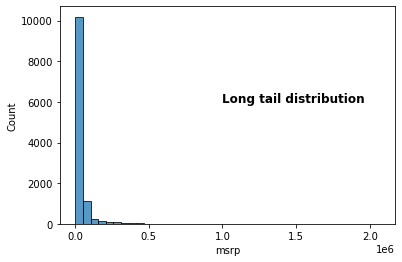

In [49]:
# Distribution of prices
sns.histplot(df.msrp, bins=40)
_ = plt.text(1e6, 6000, "Long tail distribution", horizontalalignment='left',
         size='large', color='black', weight='semibold')

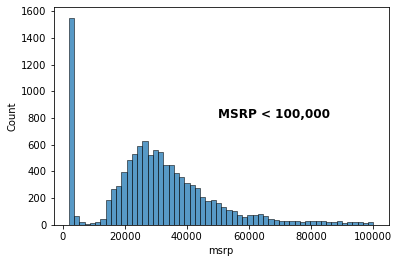

In [50]:
# Distribution of prices < $100K
sns.histplot(df.msrp[df.msrp < 1e5])
_ = plt.text(5e4, 800, "MSRP < 100,000", horizontalalignment='left',
         size='large', color='black', weight='semibold')

Text(12, 600, 'log1p MSRP')

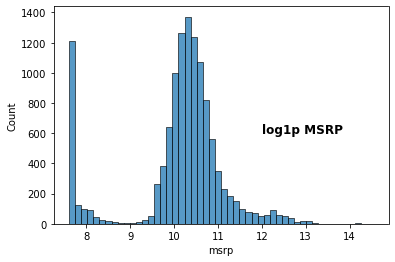

In [51]:
# Lets apply log1p to the MSRP distribution
priceLog = np.log1p(df.msrp)
_ = sns.histplot(priceLog, bins=50)
plt.text(12, 600, "log1p MSRP", horizontalalignment='left',
         size='large', color='black', weight='semibold')

### Checking missing values

In [52]:
pd.DataFrame(df.isnull().sum(), columns=['isnull'])[df.isnull().sum() != 0].\
reset_index().\
rename(columns={'index': 'column'})

,column,isnull
0,engine_fuel_type,3
1,engine_hp,69
2,engine_cylinders,30
3,number_of_doors,6
4,market_category,3742


### Validation framework

In [53]:
# Shuffled the data (rows)
n = len(df)
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [83]:
# Split the data Train:60%, Validation:20%, Test:20%
nVal = int(0.2 * n)
nTest = int(0.2 * n) 
nTrain = n - nTest - nVal

dfTrain = df.iloc[idx[:nTrain]]
dfVal = df.iloc[idx[nTrain:nTrain+nVal]]
dfTest = df.iloc[idx[nTrain+nVal:]]

print(f'The lenghts of the datasets')
print(f'*Train set: {len(dfTrain)}\t*Validation set: {len(dfVal)}\t*Test set: {len(dfTest)}')

The lenghts of the datasets
*Train set: 7150	*Validation set: 2382	*Test set: 2382


In [84]:
# Reset indeces
dfTrain.reset_index(drop=True, inplace=True)
dfVal.reset_index(drop=True, inplace=True)
dfTest.reset_index(drop=True, inplace=True)

In [58]:
# Get targets for train, val and test datasets
yTrain = np.log1p(dfTrain.msrp.values)
yVal = np.log1p(dfVal.msrp.values)
yTest = np.log1p(dfTest.msrp.values)

In [85]:
# Drop target from features data
dfTrain.drop(columns=['msrp'], inplace=True)
dfVal.drop(columns=['msrp'], inplace=True)
dfTest.drop(columns=['msrp'], inplace=True)

C:\Users\MacCasa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Linear Regression - Baseline Model

In [86]:
# Selection of Columns / features
base = list(dfTrain.dtypes[dfTrain.dtypes != 'object'].iloc[[1,2,4,5,6]].index)
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [87]:
dfTemp = dfTrain[base]
dfTemp

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [113]:
# Check NaNs
dfTemp.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [114]:
# Replace NaNs with "Zeros"
dfTemp.fillna(0, inplace=True)
dfTemp.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [115]:
# Get XTrain numpy values (array)
XTrain = dfTemp.values
XTrain

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [95]:
# Linear Regresion implementation

def TrainLinearReg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTXInv = np.linalg.inv(XTX)
    w = XTXInv.dot(X.T).dot(y)
    return round(w[0],2), w[1:].round(2)

Model parameters: w0:7.93 - w:[ 0.01 -0.16  0.01  0.01 -0.  ]
Predictions: [ 9.34  9.18  9.42 ... 10.21 11.98  9.82]


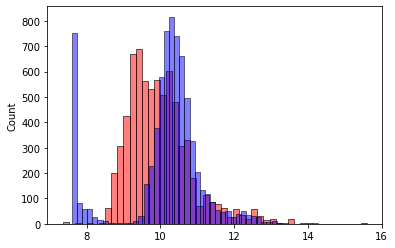

In [104]:
# Get model parameters and compare target and predicted target

w0, w = TrainLinearReg(XTrain, yTrain)
print(f'Model parameters: w0:{w0} - w:{w}')
yPred = w0 + XTrain.dot(w)
print(f'Predictions: {yPred}')
_ = sns.histplot(yPred, color='red', alpha=0.5, bins=50)
_ = sns.histplot(yTrain, color='blue', alpha=0.5, bins=50)

### RMSE

In [106]:
# Function to calculate the rmse error

def RMSE(y, yPred):
    err = (y - yPred)**2
    mse = np.sqrt(err.mean())
    return mse

In [107]:
# Calculating the error on the train dataset

trainError = RMSE(yTrain, yPred)
trainError

0.773154088626275

### Validation

In [112]:
# Function to prepare and clean up dataframes

def prepareX(df):
    dfTemp = df[base]
    dfTemp.fillna(0, inplace=True)
    X = dfTemp.values
    return X

In [111]:
Xtrain = prepareX(dfTrain)
print(XTrain.shape)
w0, w = TrainLinearReg(XTrain, yTrain)

XVal = prepareX(dfVal)
yValPred = w0 + XVal.dot(w)
valErr = RMSE(yVal, yValPred)
print(f'Validation error: {valErr}')

(7150, 5)
Validation error: 0.7837535046725055
